# Random Forest Classification

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import f1_score, roc_auc_score,confusion_matrix, accuracy_score, precision_score, recall_score, matthews_corrcoef
from IPython.display import HTML, display
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tabulate
#from utils import predict_and_evaluate

In [3]:
#df = pd.read_csv('/media/abhishek/589E61B39E618A783/C-DAC Document/Practical Machine Learning/PML/Code/Dataset/CC.csv.bz2', compression = 'bz2', index_col = 0)
df = pd.read_csv('/media/abhishek/589E61B39E618A783/C-DAC Document/Practical Machine Learning/PML/Code/Dataset/creditcard.csv')
#df = pd.read_csv('CC.csv.bz2',
 #                compression='bz2',
  #               index_col=0)

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Understand the data

In [5]:
df.shape

(284807, 31)

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### check distribution of labels

In [8]:
print("Non Fraud : ", round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print("Frauds : ", round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Non Fraud :  99.83 % of the dataset
Frauds :  0.17 % of the dataset


### The classes are haveily skewed. This is problem that needs to be solved. How ? 

In [9]:
print("Non Fraud ", round(df['Class'].value_counts()[0],2), ' are normal transaction')
print("Frauds ", round(df['Class'].value_counts()[1],2), ' are fraud')

Non Fraud  284315  are normal transaction
Frauds  492  are fraud


/home/abhishek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'class Distribution \n (0: No Fraud || 1 : Fraud)')

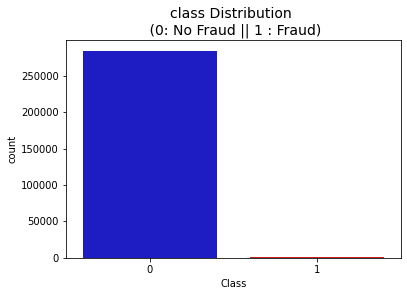

In [10]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data = df, palette = colors)
plt.title('class Distribution \n (0: No Fraud || 1 : Fraud)', fontsize = 14)

- Notice how imbalanced is our original dataset!
- Most of the transactions are non-fraud.
- If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud.
- But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

## Pre-Processing - Scaling and Distribution
 - We will first scale the columns comprise of <b>Time</b> and <b>Amount</b> .
 - Time and amount should be scaled as the other columns.
 - On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

## What is a sub-Sample?
 - In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

## Why do we create a sub-Sample?
We saw that the original dataframe is heavily imbalanced! Using the original dataframe  will cause the following issues:
<ul>
<li><b>Overfitting: </b>Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs. </li>
<li><b>Wrong Correlations:</b> Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features. </li>
</ul>

### Scaling

The **StandardScaler** assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1. 

$$\frac{\text{x}-\text{mean}}{\text{standard deviation}}$$

The **MinMaxScaler** is the probably the most famous scaling algorithm, and follows the following formula for each feature. 

$$\frac{\text{x}-\text{min}}{\text{max}-\text{min}}$$

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values). If the distribution is not Gaussian or the standard deviation is very small, the min-max scaler works better. However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler below.

**Robust Scaler** scale features using statistics that are robust to outliers. The RobustScaler uses a similar method to the Min-Max scaler but it instead uses the interquartile range, rathar than the min-max, so that it is robust to outliers. 

$$\frac{\text{x}-\text{Q1(x)}}{\text{Q3(x)}-\text{Q1(x)}}$$

- For Amount column

In [11]:
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Amount'], axis = 1, inplace = True)

In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579


#### Rearranging the columns

In [13]:
scaled_amount = df['scaled_amount']
df.drop(['scaled_amount'], axis = 1, inplace = True)
df.insert(0, 'scaled_amount', scaled_amount)

In [14]:
df.head()

,scaled_amount,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


- For Time Column

In [15]:
rob_scaler = RobustScaler()
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time'], axis = 1, inplace = True)

In [16]:
df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960


#### Rearranging the column

In [17]:
scaled_time = df['scaled_time']
df.drop(['scaled_time'], axis = 1, inplace = True)
df.insert(0, 'scaled_time', scaled_time)

In [18]:
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting the DataFrame

Before proceeding with any <b> Sampling technique</b> we have to separate the orginal dataframe.<br> 
<b> Why? for testing purposes, we want to test our models on the original testing set not on the testing set created by either of these techniques.</b><br> The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set. 

In [19]:
ss = StratifiedShuffleSplit(n_splits = 1,
                           test_size = 0.2,
                           train_size = 0.8,
                           random_state = 50)

In [20]:
x = df.drop('Class', axis = 1)
y = df['Class']

In [21]:
for train_index, test_index in ss.split(x, y):
    train_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

In [22]:
train_df

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
221234,0.678979,-0.293440,2.126322,-0.010040,-1.997102,0.276477,0.639165,-0.755860,0.445171,-0.305989,...,-0.275343,-0.048907,0.047566,0.023506,0.335408,0.420944,-0.226205,-0.045156,-0.066126,0
53575,-0.453964,-0.135401,1.100318,0.177618,0.212730,0.966039,-0.232896,-0.122320,-0.236608,0.158837,...,-0.085843,-0.084915,0.007497,-0.056042,0.169951,0.425441,0.410297,0.015957,0.032014,0
163269,0.365535,-0.125900,-0.565880,0.135593,1.400824,-2.647515,0.858462,-0.121119,0.654774,-0.243942,...,0.272824,-0.330358,-1.037985,-0.215048,-0.015207,0.432703,-0.668484,-0.170773,-0.167245,0
246069,0.802770,0.009642,-1.610536,1.450172,-1.164202,-1.269844,1.317395,2.602690,-0.595004,-0.075000,...,-0.844192,1.565997,-0.560198,0.291749,-1.730249,-0.701429,0.344150,-0.134201,0.013732,0
198872,0.563905,-0.200796,-1.124829,1.615882,-0.246758,-1.007567,0.794176,-0.388234,0.852613,0.162459,...,0.123248,-0.252198,-0.636616,-0.118839,-1.025058,-0.115831,0.224957,0.035447,0.208210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21691,-0.621283,-0.296793,-0.866737,0.793163,0.791631,-0.019310,1.675213,4.374922,-0.837459,1.629948,...,0.027757,-0.138033,-0.418125,-0.257635,1.004318,0.445748,-0.304825,0.010633,0.020619,0
226406,0.703967,1.087543,-0.897157,-0.305330,0.001853,-2.283739,-0.794812,0.796014,-0.092902,0.030927,...,-0.620535,-0.413706,-0.415258,0.075932,0.205978,-0.592265,-0.436177,-0.638159,-0.111313,0
23564,-0.609382,-0.257249,-0.459635,0.752513,1.754365,0.571020,0.284946,-0.071830,0.366709,0.124772,...,0.085457,-0.051137,-0.108876,0.133992,0.106714,-0.720905,0.213609,0.140315,0.140501,0
88109,-0.266709,2.040103,0.943566,-1.034119,0.974853,0.648536,-1.377906,0.329313,-0.844338,0.192469,...,-0.206620,-0.262192,-0.556690,-0.103136,-0.036042,0.216285,-0.409985,0.055953,0.057321,0


In [23]:
print('Distributions: \n')
print("Train Set")
print(train_df.Class.value_counts())
print("\nTest Set")
print(test_df.Class.value_counts())
print("\nPercentage:")
print("\nTrain Set")
print((train_df.Class.value_counts()/ len(train_df))*100)
print("\nTest Set")
print((test_df.Class.value_counts()/ len(test_df))*100)

Distributions: 

Train Set
0    227451
1       394
Name: Class, dtype: int64

Test Set
0    56864
1       98
Name: Class, dtype: int64

Percentage:

Train Set
0    99.827075
1     0.172925
Name: Class, dtype: float64

Test Set
0    99.827955
1     0.172045
Name: Class, dtype: float64


### Random Under-Sampling:

Implement *"Random Under Sampling"* which basically consists of removing data in order to have a more <b> balanced dataset </b> and thus avoiding our models to overfitting.

**Steps:**
<ul>
<li>The first thing we have to do is determine how <b>imbalanced</b> is our class (use "value_counts()" on the class column to determine the amount for each label)  </li>
<li>Once we determine how many instances are considered <b>fraud transactions </b> (Fraud = "1") , we should bring the <b>non-fraud transactions</b> to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.  </li>
<li> After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to <b>shuffle the data</b> to see if our models can maintain a certain accuracy everytime we run this script.</li>
</ul>

**Note:** The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of <b>information loss</b> (randomly picking 394 non-fraud transaction  from 2,27,451 non-fraud transactions)

In [24]:
train_df = train_df.sample(frac = 1)

In [53]:
fraud_df = train_df.loc[train_df['Class'] == 1]
non_fraud_df = train_df.loc[train_df['Class'] == 0][:394]    

In [26]:
fraud_df.shape
non_fraud_df.shape

(394, 31)

In [27]:
normal_df = pd.concat([fraud_df, non_fraud_df])

In [28]:
df2 = normal_df.sample(frac = 1, random_state = 42)

In [49]:
df2

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
110105,-0.152880,2.459303,1.075168,-1.187054,-0.602560,-0.674653,-0.537653,-0.020799,-0.153052,-0.077158,...,-0.114433,-0.367976,-0.956913,-0.320144,-0.790730,0.461696,1.128829,-0.115607,0.007571,0
74507,-0.341569,1.515266,-7.427924,2.948209,-8.678550,5.185303,-4.761090,-0.957095,-7.773380,0.717309,...,-0.123085,-0.299847,0.610479,0.789023,-0.564512,0.201196,-0.111225,1.144599,0.102280,1
56703,-0.436413,-0.296793,1.176716,0.557091,-0.490800,0.756424,0.249192,-0.781871,0.228750,-0.040840,...,-0.102772,-0.062166,-0.128168,-0.040176,0.110040,0.437891,0.368809,-0.018287,0.031173,1
42009,-0.514257,1.262209,-2.740483,3.658095,-4.110636,5.340242,-2.666775,-0.092782,-4.388699,-0.280133,...,0.185325,2.417495,-0.097712,0.382155,-0.154757,-0.403956,0.277895,0.830062,0.218690,1
150687,0.108143,-0.293440,-10.300820,6.483095,-15.076363,6.554191,-8.880252,-4.471672,-14.900689,3.840170,...,0.113244,1.508748,1.041642,-0.682790,0.573544,-1.602389,-0.393521,-0.468893,0.105920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145800,0.029488,5.998323,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,...,1.275358,0.480640,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096,1
261056,0.882905,0.328513,-0.408111,3.132944,-3.098030,5.803893,0.890609,-0.501474,-0.440054,0.591828,...,0.499568,0.098482,-0.538375,-0.217989,-1.042657,0.314389,0.543244,0.233851,0.119603,1
204079,0.592230,1.208831,1.862102,-0.124052,-1.989752,0.382609,0.473032,-0.674517,0.298621,-0.282416,...,0.150727,-0.204158,-0.511441,0.077874,0.388335,0.007896,-0.120980,-0.019579,0.006155,1
66967,-0.380503,0.477887,1.176609,-0.418367,0.727881,0.544218,-0.920313,-0.194964,-0.517127,0.023388,...,-0.481306,-0.499104,-1.071833,0.185201,-0.011466,0.082652,-0.580939,0.066921,0.044595,0


###  Equally Distributing 
<a id="correlating"></a>
Now that we have our dataframe correctly balanced, we can go further with our <b>analysis</b> and <b>data preprocessing</b>.

In [50]:
print(df2['Class'].value_counts()/len(df2))

0    0.5
1    0.5
Name: Class, dtype: float64


/home/abhishek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'class Distribution \n (0: No Fraud || 1 : Fraud)')

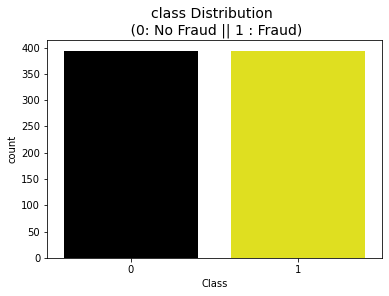

In [51]:
colors = ["Black", "Yellow"]

sns.countplot('Class', data = df2, palette = colors)
plt.title('class Distribution \n (0: No Fraud || 1 : Fraud)', fontsize = 14) 

### Training the ML Model for Fraud Detection(Classification) 

In [32]:
x_train = df2.drop('Class', axis = 1)
y_train = df2['Class']

In [33]:
x_test = test_df.drop('Class', axis = 1)
y_test = test_df['Class']

# Random Forest

In [34]:
rf_clf = RandomForestClassifier(n_estimators = 100, criterion = "entropy")

In [35]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [36]:
rf_clf.estimators_

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=102678936),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=2087038197),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1763646380),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=884351046),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1886717520),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1923326233),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=461524449),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1003707483),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
         

In [37]:
rf_clf.estimators_[3]

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       random_state=884351046)

#### Evaluation Metrics
The Given the class imbalance ratio, Confusion matrix and accuracy is not meaningful
for unbalanced classification. A robust evaluation is required to measure the
performance of a fraud detection model.

**1. False Positives:**
A false positive is an outcome where the model incorrectly predicts the positive class.
<br>**2. False Negatives:**
A false negative is an outcome where the model incorrectly predicts the negative class.
<br>**3. Precision:**
Precision talks about how precise/accurate the model is i.e. out of those predicted positives, how many of them are actual positive. Precision is a good measure to determine, when the costs of False Positives is high. For instance, here, a false positive means that a transaction is that is non- fraudulent has been identified as fraudulent. This can happen if the precision is not high for the fraud detection model.
<br>**4. Recall:**
Recall calculates how many of the Actual Positives our model captures through labeling it as Positive (True Positive). If a fraudulent transaction is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.
<br>**5. F1 Score:**
F1 Score is used to seek a balance between Precision and Recall.
<br>**6. Mathews Correlation Coefficient:**
The coefficient takes into account true and false positives and negatives and is generally regarded as a balanced measure which can be used even if the classes are of very different sizes. The MCC is in essence a correlation coefficient between the observed and predicted binary classifications; it returns a value between −1 and +1.<br> 
A coefficient of +1 represents a perfect prediction, 0 no better than random prediction and −1 indicates total disagreement between prediction and observation.<br>
The Matthews correlation coefficient is more informative than F1 score and
accuracy in evaluating binary classification problems, because it takes into
account the balance ratios of the four confusion matrix categories (true
positives, true negatives, false positives, and false negative).

### Predict and Evaluate by entring the values <b>model</b>, <b>x_test</b>, <b>y_test</b>

<b><i>  '''Predict values for given model & test dataset
    and evaluate the results in terms of FP, FN, F1-score,
    Brier Score, AUC and G-Mean'''</i></b>

In [38]:
def predict_and_evaluate(model, x_test, y_test):

    
    predictions = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, predictions) * 100
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    mcc = matthews_corrcoef(y_test,predictions)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    metrics = [fp, fn, round(accuracy,2), round(precision,2), round(recall,2), round(f1,2), round(mcc,2)]
    table_row = [[model.__class__.__name__] + metrics]
    display(HTML(tabulate.tabulate(table_row,headers=('Algorithm','False Positives', 
                                                  'False Negatives','Accuracy', 'Precision', 
                                                  'Recall', 'F1 Score', 'MCC'), 
                                   tablefmt='html')))
    return [model.__class__.__name__] + metrics

In [39]:
rf_res = predict_and_evaluate(rf_clf, x_test, y_test) 

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
RandomForestClassifier,1249,12,97.79,0.06,0.88,0.12,0.23


#### Feature Importances

In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables.

In [40]:
rf_clf.feature_importances_

array([0.00556492, 0.01640873, 0.01136474, 0.01229732, 0.04808027,
       0.10405239, 0.01064119, 0.01418718, 0.02504915, 0.01181636,
       0.021856  , 0.0925133 , 0.09811093, 0.11228158, 0.01036249,
       0.16991557, 0.00619014, 0.02858137, 0.08088703, 0.01651499,
       0.0161331 , 0.01210541, 0.02202181, 0.00768574, 0.00731399,
       0.0063937 , 0.00797839, 0.00889485, 0.00703009, 0.00776728])

In [41]:
feature_importance = pd.Series(rf_clf.feature_importances_, index = x_train.columns)
feature_importance.sort_values(ascending = False, inplace = True)

In [42]:
feature_importance

V14              0.169916
V12              0.112282
V4               0.104052
V11              0.098111
V10              0.092513
V17              0.080887
V3               0.048080
V16              0.028581
V7               0.025049
V21              0.022022
V9               0.021856
V18              0.016515
scaled_amount    0.016409
V19              0.016133
V6               0.014187
V2               0.012297
V20              0.012105
V8               0.011816
V1               0.011365
V5               0.010641
V13              0.010362
V26              0.008895
V25              0.007978
V28              0.007767
V22              0.007686
V23              0.007314
V27              0.007030
V24              0.006394
V15              0.006190
scaled_time      0.005565
dtype: float64

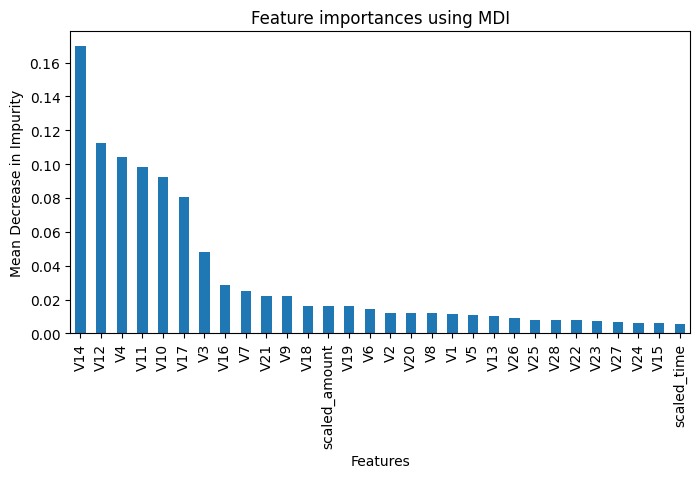

In [43]:
fig = plt.figure(figsize=(8,4), dpi=100)
feature_importance.plot.bar()
plt.title("Feature importances using MDI")
plt.xlabel("Features")
plt.ylabel("Mean Decrease in Impurity")
plt.show()

## **EXERCISE:** Train RF model again by considering only important features (e.g. top 10) and evaluate the model and observe the difference in the metrics.

In [52]:
df

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-0.296653,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0
284803,1.034963,0.038986,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0
284804,1.034975,0.641096,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0
284805,1.034975,-0.167680,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0


In [45]:
data = [df['scaled_time'],df['scaled_amount'],df['V14'], df['V10'], df['V17'], df['V4'], df['V12'], df['V11'], df['V7'], df['V3'], df['V16'], df['V2'], df['Class']]

In [46]:
headers = ["scaled_time","scaled_amount","V14", "V10", "V17", "V4", "V12", "V11", "V7", "V3", "V16", "V2", "Class"]

In [47]:
df3 = pd.concat(data, axis=1, keys=headers)

In [48]:
df3

,scaled_time,scaled_amount,V14,V10,V17,V4,V12,V11,V7,V3,V16,V2,Class
0,-0.994983,1.783274,-0.311169,0.090794,0.207971,1.378155,-0.617801,-0.551600,0.239599,2.536347,-0.470401,-0.072781,0
1,-0.994983,-0.269825,-0.143772,-0.166974,-0.114805,0.448154,1.065235,1.612727,-0.078803,0.166480,0.463917,0.266151,0
2,-0.994972,4.983721,-0.165946,0.207643,1.109969,0.379780,0.066084,0.624501,0.791461,1.773209,-2.890083,-1.340163,0
3,-0.994972,1.418291,-0.287924,-0.054952,-0.684093,-0.863291,0.178228,-0.226487,0.237609,1.792993,-1.059647,-0.185226,0
4,-0.994960,0.670579,-1.119670,0.753074,-0.237033,0.403034,0.538196,-0.822843,0.592941,1.548718,-0.451449,0.877737,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-0.296653,4.626942,4.356170,1.991691,-2.066656,2.711941,-1.593105,-4.918215,-9.834783,1.107641,10.071785,0
284803,1.034963,0.038986,-0.675143,-0.975926,-0.025693,-0.738589,0.915802,-0.150189,0.024330,2.035030,-0.711757,-0.055080,0
284804,1.034975,0.641096,-0.510602,-0.484782,0.313502,-0.557828,0.063119,0.411614,-0.296827,-3.249640,0.140716,-0.301254,0
284805,1.034975,-0.167680,0.449624,-0.399126,0.509928,0.689799,-0.962886,-1.933849,-0.686180,0.702510,-0.608577,0.530483,0


In [50]:
df3.shape

(284807, 13)

In [51]:
print("Non Fraud : ", round(df3['Class'].value_counts()[0]/len(df3) * 100,2), '% of the dataset')
print("Frauds : ", round(df3['Class'].value_counts()[1]/len(df3) * 100,2), '% of the dataset')

Non Fraud :  99.83 % of the dataset
Frauds :  0.17 % of the dataset


In [52]:
print("Non Fraud ", round(df3['Class'].value_counts()[0],2), ' are normal transaction')
print("Frauds ", round(df3['Class'].value_counts()[1],2), ' are fraud')

Non Fraud  284315  are normal transaction
Frauds  492  are fraud


In [53]:
ss = StratifiedShuffleSplit(n_splits = 1,
                           test_size = 0.2,
                           train_size = 0.8,
                           random_state = 50)

In [54]:
x1 = df3.drop('Class', axis = 1)
y1 = df3['Class']

In [55]:
for train_index, test_index in ss.split(x1, y1):
    train_df1 = df3.iloc[train_index]
    test_df1 = df3.iloc[test_index]

In [56]:
train_df1

,scaled_time,scaled_amount,V14,V10,V17,V4,V12,V11,V7,V3,V16,V2,Class
221234,0.678979,-0.293440,0.569714,-0.048368,-0.237470,0.276477,-0.086572,-1.433705,0.445171,-1.997102,-0.620654,-0.010040,0
53575,-0.453964,-0.135401,-1.375245,-0.657439,1.223388,0.966039,1.170186,1.762968,-0.236608,0.212730,-0.063234,0.177618,0
163269,0.365535,-0.125900,-0.742340,-0.233874,-0.452111,-2.647515,-0.653155,-1.092282,0.654774,1.400824,1.372909,0.135593,0
246069,0.802770,0.009642,1.196803,-0.928533,0.754119,-1.269844,0.779412,0.175939,-0.595004,-1.164202,-0.745326,1.450172,0
198872,0.563905,-0.200796,-0.047681,-0.302465,-0.632465,-1.007567,0.737696,-1.670722,0.852613,-0.246758,0.091765,1.615882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21691,-0.621283,-0.296793,-0.056859,-0.806754,-0.052083,-0.019310,0.160261,-0.943760,-0.837459,0.791631,-0.137833,0.793163,0
226406,0.703967,1.087543,-0.994458,1.372831,0.771743,-2.283739,0.083809,-0.384317,-0.092902,0.001853,-1.261566,-0.305330,0
23564,-0.609382,-0.257249,0.243658,-0.337445,0.618390,0.571020,0.452742,0.488449,0.366709,1.754365,-0.893923,0.752513,0
88109,-0.266709,2.040103,-0.116470,0.820355,-0.505563,0.648536,0.513435,0.461294,-0.844338,0.974853,-0.878728,-1.034119,0


In [57]:
print('Distributions: \n')
print("Train Set")
print(train_df1.Class.value_counts())
print("\nTest Set")
print(test_df1.Class.value_counts())
print("\nPercentage:")
print("\nTrain Set")
print((train_df1.Class.value_counts()/ len(train_df1))*100)
print("\nTest Set")
print((test_df1.Class.value_counts()/ len(test_df1))*100)

Distributions: 

Train Set
0    227451
1       394
Name: Class, dtype: int64

Test Set
0    56864
1       98
Name: Class, dtype: int64

Percentage:

Train Set
0    99.827075
1     0.172925
Name: Class, dtype: float64

Test Set
0    99.827955
1     0.172045
Name: Class, dtype: float64


In [58]:
train_df1 = train_df1.sample(frac = 1)

In [59]:
fraud_df1 = train_df1.loc[train_df1['Class'] == 1]
non_fraud_df1 = train_df1.loc[train_df1['Class'] == 0][:394]    

In [60]:
normal_df1 = pd.concat([fraud_df1, non_fraud_df1])

In [61]:
df4 = normal_df1.sample(frac = 1, random_state = 42)

In [62]:
df4.head(10)

,scaled_time,scaled_amount,V14,V10,V17,V4,V12,V11,V7,V3,V16,V2,Class
18598,-0.646883,-0.097953,-0.052868,-0.781729,0.463724,0.083425,0.099693,-0.160871,0.264224,0.880171,0.220499,1.210993,0
151008,0.113606,-0.293440,-3.926207,-22.187089,-12.462315,8.904157,-10.592305,4.419997,-31.197329,-30.177317,-6.809890,16.497472,1
118308,-0.113476,0.113743,-0.660968,-1.039638,0.278142,0.317131,-0.664684,-0.395608,1.078234,0.645789,0.530852,0.985633,1
20198,-0.632526,1.157130,-0.913787,3.245086,0.022045,2.861292,-0.677096,0.675288,1.767760,1.199930,-1.024502,0.885657,1
43428,-0.507372,4.781527,-9.373859,-14.110184,-19.236292,9.505594,-10.834006,5.299236,-16.701694,-18.649853,-9.899247,8.584972,1
70589,-0.361318,3.351778,-4.058523,-5.459602,-5.603400,-0.572676,-2.330271,2.378537,-3.039520,-2.372652,-2.522661,1.573578,1
181746,0.474829,0.809055,-0.226130,0.871966,-0.054060,-0.929527,0.050890,0.882925,-1.083305,-0.649090,1.327337,-1.264126,0
274475,0.955556,0.250122,-3.565119,-2.516628,-1.731413,1.970759,-2.513104,0.874052,-0.055178,-3.171195,-2.015713,2.361594,1
9252,-0.838461,-0.293440,-18.049998,-13.136698,-14.744902,8.594342,-17.131301,11.228470,-9.252794,-12.752811,-9.723565,8.287421,1
153823,0.182462,-0.275554,-7.383370,-18.913243,-13.806568,12.114672,-12.686308,4.971249,-28.011293,-22.801238,-8.582309,14.706335,1


In [63]:
print(df4['Class'].value_counts()/len(df4))

0    0.5
1    0.5
Name: Class, dtype: float64


In [64]:
x_train1 = df4.drop('Class', axis = 1)
y_train1 = df4['Class']

In [65]:
x_test1 = test_df1.drop('Class', axis = 1)
y_test1 = test_df1['Class']

In [66]:
rf_clf_1 = RandomForestClassifier(n_estimators = 100, criterion = "entropy")

In [67]:
rf_clf_1.fit(x_train1, y_train1)

RandomForestClassifier(criterion='entropy')

In [68]:
def predict_and_evaluate(model, x_test1, y_test1):

    
    predictions = model.predict(x_test1)
    
    accuracy = accuracy_score(y_test1, predictions) * 100
    precision = precision_score(y_test1, predictions)
    recall = recall_score(y_test1, predictions)
    f1 = f1_score(y_test1, predictions)
    mcc = matthews_corrcoef(y_test1,predictions)
    tn, fp, fn, tp = confusion_matrix(y_test1, predictions).ravel()
    
    metrics = [fp, fn, round(accuracy,2), round(precision,2), round(recall,2), round(f1,2), round(mcc,2)]
    table_row = [[model.__class__.__name__] + metrics]
    display(HTML(tabulate.tabulate(table_row,headers=('Algorithm','False Positives', 
                                                  'False Negatives','Accuracy', 'Precision', 
                                                  'Recall', 'F1 Score', 'MCC'), 
                                   tablefmt='html')))
    return [model.__class__.__name__] + metrics

In [69]:
rf_res1 = predict_and_evaluate(rf_clf_1, x_test1, y_test1) 

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
RandomForestClassifier,1058,10,98.13,0.08,0.9,0.14,0.26


### Gradient Boosting

In [70]:
gb_clf = GradientBoostingClassifier()
gb_clf_1 = GradientBoostingClassifier()

In [71]:
gb_clf.fit(x_train, y_train)
gb_clf_1.fit(x_train1, y_train1)

GradientBoostingClassifier()

In [72]:
gb_res = predict_and_evaluate(gb_clf, x_test, y_test) 

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
GradientBoostingClassifier,2048,7,96.39,0.04,0.93,0.08,0.19


In [73]:
gb_res_1 = predict_and_evaluate(gb_clf_1, x_test1, y_test1) 

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
GradientBoostingClassifier,1714,8,96.98,0.05,0.92,0.09,0.21


## XGBoost

In [74]:
xgb_clf = XGBClassifier(n_estimators=10)
xgb_clf.fit(x_train,y_train)

[23:15:19] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abhishek/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
xgb_clf_1 = XGBClassifier()
xgb_clf_1.fit(x_train1,y_train1)

[23:15:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
xgb_res = predict_and_evaluate(xgb_clf, x_test, y_test)

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
XGBClassifier,2600,9,95.42,0.03,0.91,0.06,0.17


In [77]:
xgb_res_1 = predict_and_evaluate(xgb_clf_1, x_test1, y_test1)

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
XGBClassifier,1705,9,96.99,0.05,0.91,0.09,0.21


## SVM

In [78]:
svm_clf = SVC()
svm_clf_1 = SVC()

In [79]:
svm_clf.fit(x_train, y_train)
svm_clf_1.fit(x_train1, y_train1)

SVC()

In [80]:
svm_res = predict_and_evaluate(svm_clf, x_test, y_test)

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
SVC,898,11,98.4,0.09,0.89,0.16,0.28


In [81]:
svm_res_1 = predict_and_evaluate(svm_clf_1, x_test1, y_test1)

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
SVC,719,13,98.71,0.11,0.87,0.19,0.3


## Comparing the metrics for all the algorithms

In [82]:
results = pd.DataFrame(data=[rf_res, gb_res, xgb_res, svm_res], 
             columns=('Algorithm','False Positives', 
                      'False Negatives','Accuracy', 'Precision', 
                      'Recall', 'F1 Score', 'MCC'))

In [83]:
results

,Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
0,RandomForestClassifier,1123,9,98.01,0.07,0.91,0.14,0.26
1,GradientBoostingClassifier,2048,7,96.39,0.04,0.93,0.08,0.19
2,XGBClassifier,2600,9,95.42,0.03,0.91,0.06,0.17
3,SVC,898,11,98.40,0.09,0.89,0.16,0.28


### For the Top 10 specific features of the dataframe

In [84]:
results_1 = pd.DataFrame(data=[rf_res1, gb_res_1, xgb_res_1, svm_res_1], 
             columns=('Algorithm','False Positives', 
                      'False Negatives', 'Accuracy', 'Precision', 
                      'Recall', 'F1 Score', 'MCC'))

In [85]:
results_1

,Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
0,RandomForestClassifier,1058,10,98.13,0.08,0.90,0.14,0.26
1,GradientBoostingClassifier,1714,8,96.98,0.05,0.92,0.09,0.21
2,XGBClassifier,1705,9,96.99,0.05,0.91,0.09,0.21
3,SVC,719,13,98.71,0.11,0.87,0.19,0.30


# Hypter-Parameter Tuning
<b><l>Hyperparameter tuning refers to the shaping of the model architecture from the available space. This, in simple words, is nothing but searching for the night hyperparameter to find high precision and accuracy. Two of the most widely-used parameter optimiser techniques,</b></l> are : 
 - <i>Grid Search</i>
 - <i>Random Search</i>

In [86]:
#train_df = pd.read_csv("train_data.csv")
#test_df = pd.read_csv("test_data.csv")

In [87]:
train_df.shape

(227845, 31)

In [88]:
x_train = train_df.drop('Class', axis=1)
y_train = train_df['Class']

x_test = test_df.drop('Class', axis=1)
y_test = test_df['Class']

## Grid Search

 - In this tuning technique, we simply build a model for every combination of various hyperparameters and evaluate each model. The model which gives the highest accuracy wins.
 - The pattern followed here is similar to the grid, where all the values are placed in the form of a matrix.
 - Each set of parameters is taken into consideration and the accuracy is noted.
 - Once all the combinations are evaluated, the model with the set of parameters which give the top accuracy is considered to be the best. 

In [89]:
 rf_params = {'n_estimators': [100, 200, 300, 500, 800],
                'max_features': ['sqrt', 'log2'],
                'max_depth': [8, 10, 20],
                'min_samples_split': [2, 5, 10]
               }

# # Parameter matrix for Gradient Boost
 gbm_params = {  "n_estimators":[100,150,200],
                 "learning_rate": [0.01, 0.025, 0.05],
                 "max_depth":[3,5],
                 "subsample":[ 0.8, 0.9,1.0], 
             }

 # Parameter matrix for XGBoost
xgb_params = {'n_estimators' : [100,400,800],
          "learning_rate"    : [0.01,0.05, 0.10] ,
          "max_depth"        : [ 3, 5, 7, 13],
          "min_child_weight" : [ 3, 5],}

In [90]:
xgb_params = {'n_estimators' : [100, 200],
              "max_depth"    : [ 3, 4],
         }

In [91]:
gs_xgb = GridSearchCV(estimator= XGBClassifier(), 
                        param_grid= xgb_params, 
                        n_jobs = 4)

In [92]:
gs_xgb.fit(x_train, y_train)

/home/abhishek/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:15] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameter

In [93]:
gs_xgb.best_params_

{'max_depth': 4, 'n_estimators': 200}

In [94]:
gs_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [95]:
# predictons
xgb_gs_hpo = predict_and_evaluate(gs_xgb.best_estimator_, x_test, y_test)

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
XGBClassifier,7,15,99.96,0.92,0.85,0.88,0.88


## Random Search
Random search is a technique where random combinations of the hyperparameters are used to find the best solution for the built model.

In [96]:
rs_xgb = RandomizedSearchCV(estimator= XGBClassifier(), 
                        param_distributions = xgb_params,
                        n_iter= 2,
                        n_jobs = 2)

In [97]:
%time rs_xgb.fit(x_train, y_train)

/home/abhishek/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:31:01] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 5min 1s, sys: 1.83 s, total: 5min 3s
Wall time: 5min 44s


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                           reg_lamb

In [98]:
rs_xgb.best_params_

{'n_estimators': 200, 'max_depth': 4}

In [99]:
rs_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
# predictons
xgb_rs_hpo = predict_and_evaluate(gs_xgb.best_estimator_, x_test, y_test)

Algorithm,False Positives,False Negatives,Accuracy,Precision,Recall,F1 Score,MCC
XGBClassifier,7,15,99.96,0.92,0.85,0.88,0.88
